In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

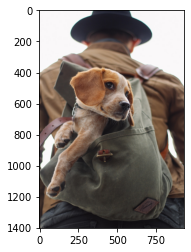

In [3]:
plt.imshow(img1)

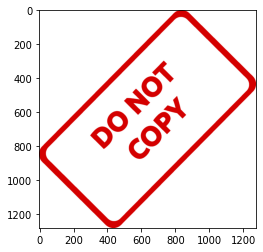

In [4]:
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

## Blending with the same size of images

In [7]:
img1 = cv2.resize(img1, dsize=(1200,1200))
img2 = cv2.resize(img2, dsize=(1200,1200))

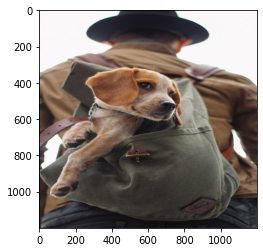

In [8]:
plt.imshow(img1)

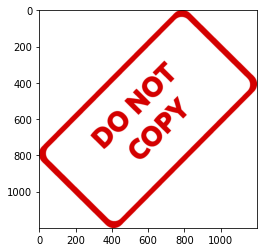

In [9]:
plt.imshow(img2)

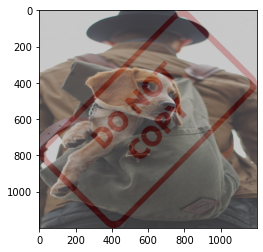

In [10]:
blended = cv2.addWeighted(img1, alpha=0.6, src2=img2, beta=0.2, gamma=0)
plt.imshow(blended)

## Blending with the different size of images
### 1. Overlay the smaller image on top of the larger image (No blending)

In [11]:
img1 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#### Pick the img2 is the smaller image

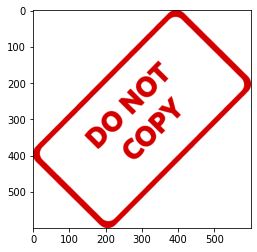

In [12]:
img2 = cv2.resize(img2, dsize=(600,600))
plt.imshow(img2)

#### Labeling

In [13]:
larger_img = img1
smaller_img = img2

In [14]:
smaller_img.shape

(600, 600, 3)

In [15]:
x_offset = 0
y_offset = 0
x_end = x_offset + smaller_img.shape[1]
y_end = y_offset + smaller_img.shape[0]

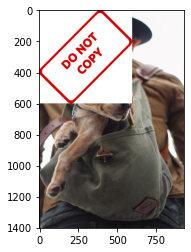

In [16]:
larger_img[y_offset:y_end, x_offset:x_end] = smaller_img
plt.imshow(larger_img)

### 2. Blending the different size images

In [17]:
img1 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

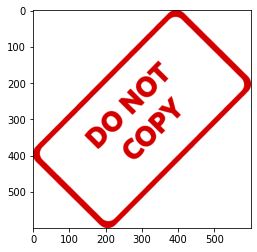

In [18]:
img2 = cv2.resize(img2, dsize=(600,600))
plt.imshow(img2)

In [19]:
rows, cols, channels = img1.shape

In [20]:
x_offset = cols - img2.shape[1]
y_offset = rows - img2.shape[0]

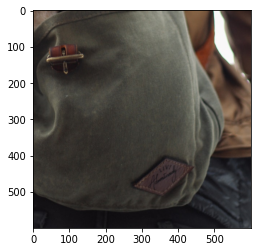

In [21]:
roi = img1[y_offset:rows, x_offset:cols]
plt.imshow(roi)

#### Create mask

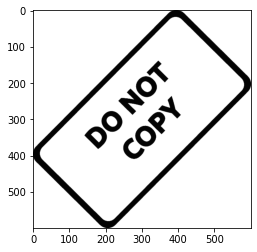

In [23]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray')

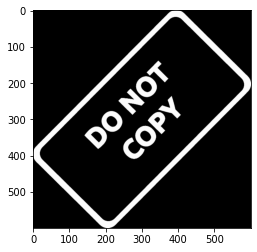

In [24]:
img2_gray = cv2.bitwise_not(img2_gray)
plt.imshow(img2_gray,cmap='gray')

In [25]:
img2_gray.shape

(600, 600)

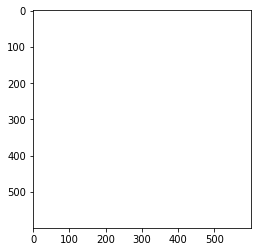

In [26]:
import numpy as np
white_bg = np.full(img2.shape, fill_value=255, dtype=np.uint8)
plt.imshow(white_bg)

In [31]:
white_bg.shape

(600, 600, 3)

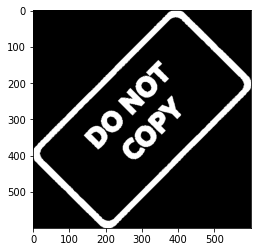

In [32]:
bg = cv2.bitwise_or(white_bg, white_bg, mask=img2_gray)
plt.imshow(bg)

In [33]:
bg.shape

(600, 600, 3)

In [34]:
fg = cv2.bitwise_or(img2, img2, mask=img2_gray)

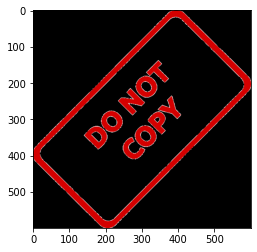

In [35]:
plt.imshow(fg)

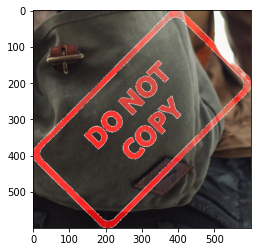

In [36]:
fg_roi = cv2.bitwise_or(roi, fg)
plt.imshow(fg_roi)

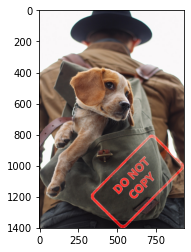

In [37]:
img1[y_offset:rows, x_offset:cols] = fg_roi
plt.imshow(img1)

## Practice

In [2]:
img1 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\Logo.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\00-puppy.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

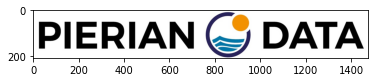

In [3]:
plt.imshow(img1)

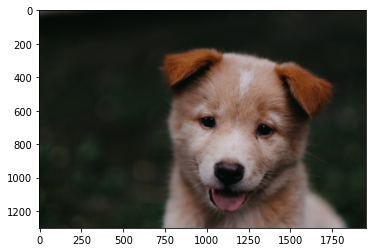

In [4]:
plt.imshow(img2)

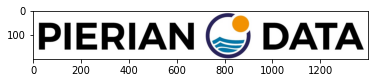

In [4]:
img1 = cv2.resize(img1, dsize=(1400,200))
plt.imshow(img1)

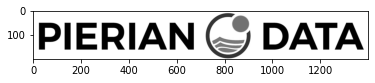

In [5]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1_gray, cmap='gray')

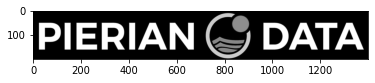

In [6]:
mask = cv2.bitwise_not(img1_gray)
plt.imshow(mask, cmap='gray')

In [7]:
mask.shape

(200, 1400)

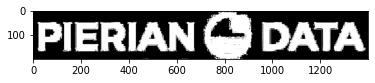

In [9]:
rec, thres = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
plt.imshow(thres, cmap='gray')

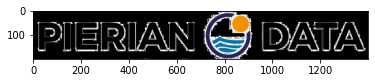

In [10]:
bg = cv2.bitwise_or(img1, img1, mask=thres)
plt.imshow(bg)

In [10]:
bg.shape

(200, 1400, 3)

In [11]:
rows, cols, channels = img2.shape

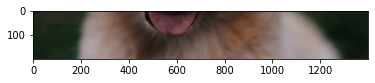

In [12]:
roi = img2[rows-img1.shape[0]:rows,cols-img1.shape[1]:cols]
plt.imshow(roi)

In [13]:
roi.shape

(200, 1400, 3)

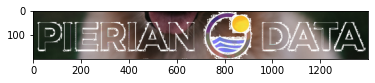

In [17]:
fg_roi = cv2.bitwise_or(roi, bg)
plt.imshow(fg_roi)

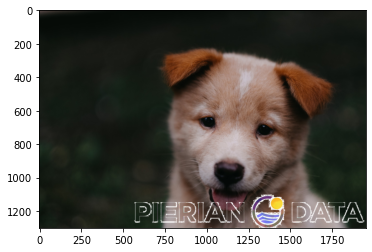

In [15]:
img2[rows-img1.shape[0]:rows,cols-img1.shape[1]:cols] = fg_roi
plt.imshow(img2)